In [1]:
import numpy as np

# Imports nécessaires pour construire un modèle LeNet 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Rescaling, BatchNormalization

# Pour importer le datasets
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Pour la compilation du modèle
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Pour visualiser les performances
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

print(tf.__version__)
tf.keras.backend.clear_session()
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Chargement du dataset
img_size = (224, 224)  # Taille cible
batch_size = 128

train_ds = image_dataset_from_directory(
    "/mnt/c/Users/karim/rakuten/images/data_clean/images_deep/sample",
    image_size=img_size,
    batch_size=batch_size,
    subset="training",
    validation_split=0.2,
    seed=42
)

val_ds = image_dataset_from_directory(
    "/mnt/c/Users/karim/rakuten/images/data_clean/images_deep/sample",
    image_size=img_size,
    batch_size=batch_size,
    subset="validation",
    validation_split=0.2,
    seed=42
)

2025-03-15 11:56:25.987972: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742036186.005465   28651 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742036186.011344   28651 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742036186.026291   28651 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742036186.026309   28651 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742036186.026311   28651 computation_placer.cc:177] computation placer alr

2.19.0
Num GPUs Available:  1
Found 6851 files belonging to 3 classes.
Using 5481 files for training.


I0000 00:00:1742036196.447976   28651 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:01:00.0, compute capability: 8.9


Found 6851 files belonging to 3 classes.
Using 1370 files for validation.


## Définition des couches partagées

In [2]:
# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
])

# Normalisation 
normalization_layer = Rescaling(1./255)

## Version custom de LeNet

In [3]:
###  Architecture du model ###

inputs = Input(shape=(224, 224, 3))

# Extraction des caractéristqiues

x = data_augmentation(inputs)
x = normalization_layer(x)

# Première couche de convolution
x = Conv2D(
    filters=30,                    
    kernel_size=(5, 5),            
    padding='valid',               
    activation='relu',            
)(x)
x = MaxPooling2D(pool_size=(2, 2),)(x)
x = Dropout(0,2)(x)

# Deuxième couche de convolution
x = Conv2D(
    filters=16,                    
    kernel_size=(5, 5),            
    padding='valid',               
    activation='relu',            
)(x)
x = MaxPooling2D(pool_size=(2, 2),)(x)
x = Dropout(0,2)(x)

# Applatissement 
x = Flatten()(x)

# Couches dense pour la prédiction 
dense_128 = Dense(
    units=128,
    activation='relu',
)

# Couche de sortie
outputs = Dense(
    units=3,
    activation='softmax',
)(x)

reduce_learning_rate = ReduceLROnPlateau(
                                    monitor="val_loss",
                                    patience=3,
                                    min_delta=0.01,
                                    factor=0.5, 
                                    cooldown=4)

model_lenet = Model(inputs=inputs, outputs=outputs)

model_lenet.compile(
    loss='sparse_categorical_crossentropy',  
    optimizer="adam",                 
    metrics=['accuracy'])             

model_lenet_history = model_lenet.fit(train_ds,           # données
                           validation_data=val_ds,
                           epochs=30,
                           callbacks=[reduce_learning_rate])             # taille des batchs

# modèle LeNet
val_loss, val_accuracy = model_lenet.evaluate(val_ds)
print(f"Précision de validation finale: {val_accuracy:.4f}")
display_results(model_lenet_history, "LeNet")

Epoch 1/30


I0000 00:00:1742035354.272792   23151 cuda_dnn.cc:529] Loaded cuDNN version 90800


43/43 ━━━━━━━━━━━━━━━━━━━━ 15s 185ms/step - accuracy: 0.3885 - loss: 1.2685 - val_accuracy: 0.4460 - val_loss: 1.0064 - learning_rate: 0.0010
Epoch 2/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.4830 - loss: 1.0089 - val_accuracy: 0.4102 - val_loss: 1.1034 - learning_rate: 0.0010
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.5188 - loss: 0.9905 - val_accuracy: 0.4971 - val_loss: 0.9608 - learning_rate: 0.0010
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.5532 - loss: 0.9435 - val_accuracy: 0.5679 - val_loss: 0.9373 - learning_rate: 0.0010
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.5749 - loss: 0.9206 - val_accuracy: 0.5358 - val_loss: 0.9362 - learning_rate: 0.0010
Epoch 6/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.5869 - loss: 0.9005 - val_accuracy: 0.5248 - val_loss: 0.9476 - learning_rate: 0.0010
Epoch 7/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.5780 - loss: 0.9131 - val_accurac

## modèle MobileNetV2

Epoch 1/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 231ms/step - accuracy: 0.3606 - loss: 1.5271 - val_accuracy: 0.6518 - val_loss: 0.8130 - learning_rate: 1.0000e-04
Epoch 2/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - accuracy: 0.5983 - loss: 0.9100 - val_accuracy: 0.7234 - val_loss: 0.6765 - learning_rate: 1.0000e-04
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 208ms/step - accuracy: 0.6704 - loss: 0.7796 - val_accuracy: 0.7401 - val_loss: 0.6296 - learning_rate: 1.0000e-04
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 210ms/step - accuracy: 0.6898 - loss: 0.7354 - val_accuracy: 0.7482 - val_loss: 0.6052 - learning_rate: 1.0000e-04
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - accuracy: 0.7158 - loss: 0.6757 - val_accuracy: 0.7540 - val_loss: 0.5919 - learning_rate: 1.0000e-04
Epoch 6/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 206ms/step - accuracy: 0.7265 - loss: 0.6557 - val_accuracy: 0.7628 - val_loss: 0.5739 - learning_rate: 1.0000e-04
Epoch 7/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 211ms/step - accuracy:

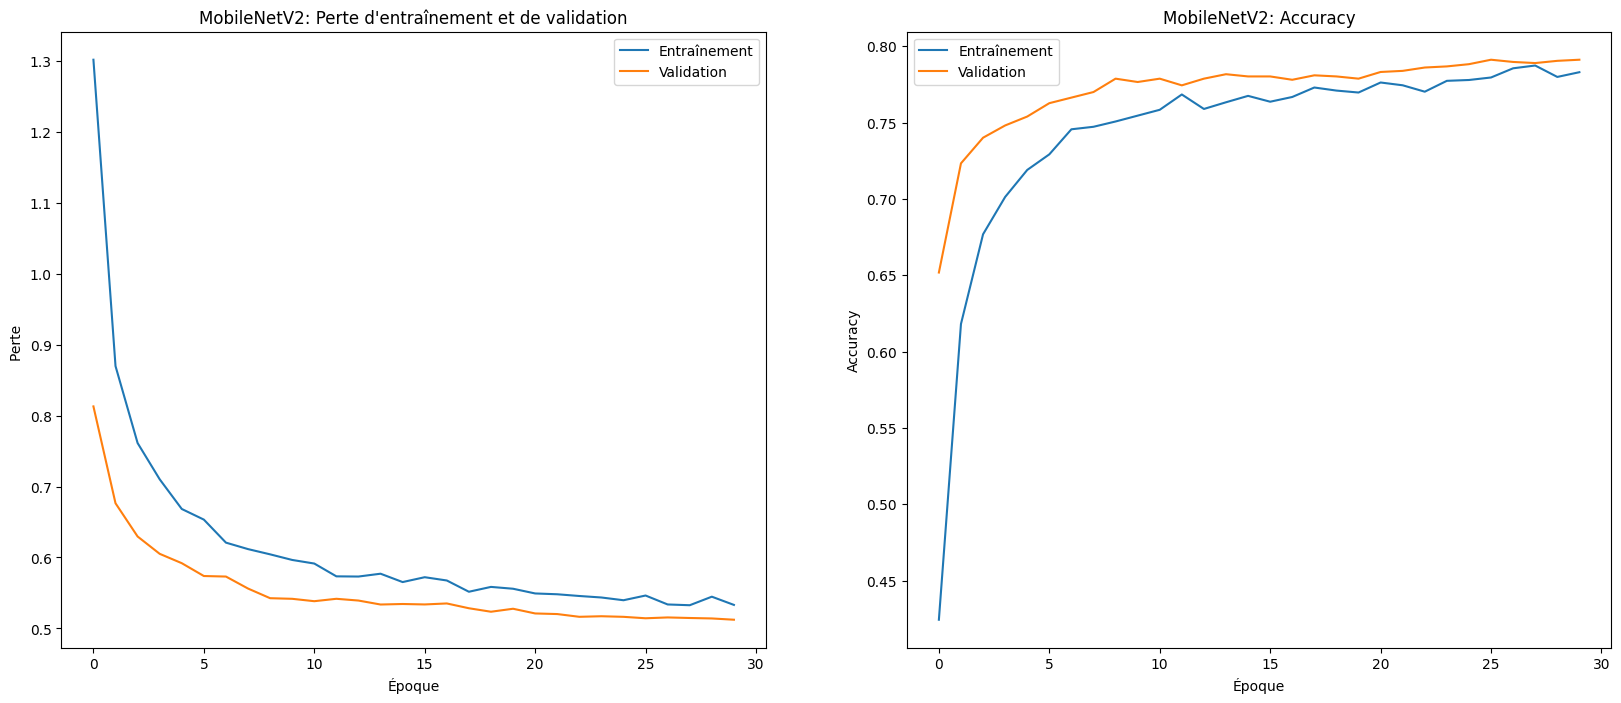

In [11]:
#tf.keras.applications.MobileNetV2
import tensorflow as tf 
from tensorflow.keras.applications import MobileNetV2

# 1. Choisir un modèle préentraîné
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Geler d'abord le modèle de base

# 2. Construire le modèle complet
model_mobilnet = tf.keras.Sequential([
    # Augmentation de données
    data_augmentation,
    
    # Prétraitement spécifique au modèle
    tf.keras.layers.Rescaling(1./127.5, offset=-1),  # Pour MobileNetV2
    
    # Modèle de base
    base_model,
    
    # Couches de classification
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(3, activation='softmax')
])

ReduceLR_callback = ReduceLROnPlateau(
                                    monitor="val_loss",
                                    patience=3,
                                    min_delta=0.01,
                                    factor=0.5, 
                                    cooldown=4)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

model_mobilnet.compile(
    loss='sparse_categorical_crossentropy',  
    optimizer= tf.keras.optimizers.Adam(learning_rate=1e-4),                 
    metrics=['accuracy'])             

model_mobilnet_history = model_mobilnet.fit(train_ds,           
                           validation_data=val_ds,
                           epochs=30,
                           callbacks=[ReduceLR_callback])             


# modèle MobilNetV2
val_loss, val_accuracy = model_mobilnet.evaluate(val_ds)
print(f"Précision de validation finale: {val_accuracy:.4f}")
display_results(model_mobilnet_history, "MobileNetV2")

## Analyse de l'entrainement

In [3]:
def display_results(model_history, model_name):
    # Récupérer les données d'entraînement et de validation
    train_loss = model_history.history["loss"]
    val_loss = model_history.history["val_loss"]
    train_accuracy =  model_history.history["accuracy"]
    val_accuracy = model_history.history["val_accuracy"]
    
    plt.figure(figsize=(20, 8))
    
    # Tracer la perte
    plt.subplot(121)
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.title(model_name + ": Perte d'entraînement et de validation")
    plt.ylabel('Perte ')
    plt.xlabel('Époque')
    plt.legend(['Entraînement', 'Validation'], loc='best')
    
    # Tracer l'erreur absolue moyenne (MAE)
    plt.subplot(122)
    plt.plot(train_accuracy)
    plt.plot(val_accuracy)
    plt.title(model_name+': Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Époque')
    plt.legend(['Entraînement', 'Validation'], loc='best')
    
    plt.show()




